<style>
div.slide-background div.slide-background div.slide-background-content::after {
  position: absolute;
  left: 50%;
  bottom: 0;
  transform: translate(-50%);
  font-size: 75%;
  color: red;
  content: "\00a9 2022 by 辜勇 江西财经大学软件学院";
}
</style>
<div class="title">第二章 Vue 基础2</div>
<div class="center">《Web设计》</div>

# 大纲
1. 事件处理(Event Handling)
2. 表单输入绑定(Form Input Binding)
3. 生命周期钩子(Lifecycle Hooks)
4. 监听器(watchers)
5. Template Refs（模板引用）
6. 组件基础

# 事件处理
Vue使用`v-on:[eventName]`指令来监听事件,可简写为`@[eventName]`  
该指令的值（也就是事件处理器）有两种可能：
* 内联(inline)处理器：JS执行语句
* 方法(method)处理器：指向一个方法的属性名称

```js
data() {
  return {
    count: 0
  }
}
```
```html
<button @click="count++;count+=2;">Add 1</button>
<p>Count is: {{ count }}</p>
```

## 方法(method)处理器
处理器表达式是以下情况：
* 单个的标识符:该标识符（也就是一个名称）是一个函数
* 属性访问表达式：该属性访问表达式的值是一个函数
* 函数表达式（定义）
```html
<button @click="add">add</button>
<button @click="counter.add">add</button>
<button @click="counter['add']">add</button>
<button @click="function(event){msg += event.target.tagName;}">add</button>
```

```html
<button @click="add">add</button>
```
此种方式下，该函数会在事件触发时自动执行，并且第一个参数是“DOM事件对象"（实参的传递是自动的）
```js
function add(event){
    this.msg += event.target.tagName;
}
```

## 内联(inline)处理器
处理器是一个其它语句，一般用于语句比较简单的情形（语句复杂时可以写成函数调用或方法处理器）
```html
<button @click="count += 1">add</button>
<button @click="add()">add</button>
```
此种方式下，没有自动的参数传递，所有参数都要手动传递，通过`$event`来访问DOM事件对象

```html
<!-- 方法处理器写法 -->
<button @click="function(event){msg += event.target.tagName;}">add</button>
<!-- 内联处理器写法 -->
<button @click="msg += $event.target.tagName">add</button>
```

注意，即使函数调用的表达式的值是一个函数对象，这也是一个内联处理器：返回的函数对象不会执行
```js
data() {
    return {
        msg: "hello",
    }
},
methods:{
    createAdder(k){
        return (event)=>{
            this.msg += event.name + k;
            console.log(msg);
        }
    }
}
```
```html
<button @click="createAdder(3)">add</button>
<div> {{msg}}</div>
```

## 事件修饰符(Event Modifiers)
经常需要在事件处理器中调用`event.preventDefault()` 或 `event.stopPropagation()`, 直接写在事件处理器中也比较容易。

但是，如果事件处理器中是”干净“的数据逻辑，而不需要与DOM事件打交道，会更好（代码更整洁，更易维护）。

Vue提供了事件修饰符来实现该功能：通过指令修饰符的方式
* .stop
* .prevent
* .self
* .capture
* .once
* .passive

```html
<!-- 单击事件触发时，浏览器不仅会执行doThis(event), 还会执行event.stopPropagation() -->
<a @click.stop="doThis"></a>

<!-- 提交事件触发时，浏览器不仅会执行onSubmit(event), 还会执行event.preventDefault() -->
<form @submit.prevent="onSubmit"></form>

<!-- 事件修饰符可以串联，有时顺序很重要 -->
<a @click.stop.prevent="doThat"></a>

<!-- 可以只有事件修饰符，没有事件处理器 -->
<form @submit.prevent></form>

<!-- 只有事件是发生在该元素（而不是它的后代元素）上时才会触发该事件 -->
<div @click.self="doThat">...</div>
```

## 按键修饰符
监听键盘事件时，我们经常需要检查特定的按键

```html
<!-- keyup事件发生时，只有按的键是enter键才会触发 -->
<input @keyup.enter="submit" />

<!-- 驼峰法要转换成连字符形式 -->
<input @keyup.page-down="onPageDown" />
```
Vue对某些常用的键提供了别名
.tab .delete .esc .space .up .down .left .right

系统修饰键(需要按住不放)：.ctrl .alt .shift .meta

```html
<!-- enter键释放时，alt键处于按住状态，才会触发 -->
<input @keyup.alt.enter="clear" />
```
如果想要避免其它系统修饰键，可以使用.exact
```html
<!-- enter键释放时，alt键处于按住状态并且没有其它系统修饰键被按住，才会触发 -->
<input @keyup.alt.exact="clear" />
```

鼠标修饰符：.left .right .middle

# 表单输入绑定
一般情况下，表单元素需要双向同步（绑定）数据
```html
<input
  :value="text"
  @input="event => text = event.target.value">
```

像上面那样手动绑定比较麻烦，Vue提供`v-model`来简化

```html
<input v-model="text">
```

`v-model`只是一种”语法糖“，它没有新的功能，它的功能可以通过已有的语法来实现。

`v-model`会根据不同的输入（input)类型，展开成不同的DOM属性和事件

* `<input type="text">`和`<textarea>`元素绑定的是`value`属性和`input`事件
* `<input type="checkbox">`和`<input type="radio">`元素绑定的是`checked`属性和`change`事件
* `<select>`绑定的是`value`事件和`change`事件

`v-model`会忽略元素上value, checked, selected等属性(html attribute)的初始值。初始值应该设置在绑定的状态变量上

## text

```html
<input v-model="message" placeholder="edit me" />
<p>Message is: {{ message }}</p>
```
绑定的变量是message, 对应的值是输入框中的值，数据类型是字符串。
<div class="warn">能否绑定其它数据类型，例如number?</div>

## multiline text
```html
<span>Multiline message is:</span>
<p style="white-space: pre-line;">{{ message }}</p>
<textarea v-model="message" placeholder="add multiple lines"></textarea>
```
不能在`textarea`元素内使用文本插值
```html
<!-- 不起作用 -->
<textarea>{{ text }}</textarea>
```

## checkbox
多选按钮

```html
<input type="checkbox" id="checkbox" v-model="checked" />
<label for="checkbox">{{ checked }}</label>
```
单个的 checkbox 绑定的数据类型是布尔(boolean)
<div class="warn">绑定的数据值只能是true或false, 能否自定义其它值?能否是动态的？</div>

可以将多个 checkbox 绑定到一个数组或Set

```js
export default {
  data() {
    return {
      checkedNames: []
    }
  }
}
```

```html
<div>Checked names: {{ checkedNames }}</div>

<input type="checkbox" id="jack" value="Jack" v-model="checkedNames">
<label for="jack">Jack</label>

<input type="checkbox" id="john" value="John" v-model="checkedNames">
<label for="john">John</label>

<input type="checkbox" id="mike" value="Mike" v-model="checkedNames">
<label for="mike">Mike</label>
```
`checkedNames`数组的元素始终是选中的复选框所对应的值(value)
<div class="warn">这里的value也可以是动态绑定？</div>

## radio
单选按钮

```html
<div>Picked: {{ picked }}</div>

<input type="radio" id="one" value="One" v-model="picked" />
<label for="one">One</label>

<input type="radio" id="two" value="Two" v-model="picked" />
<label for="two">Two</label>
```
这里绑定的变量是picked, 绑定的值是One和Two中的一个
<div class="warn">这里绑定的值value是否也可以是动态的？</div>  

使用`v-bind:value="someVar"`

## select
下拉列表：绑定的变量的值是`<option>`中的文本
```html
<div>Selected: {{ selected }}</div>

<select v-model="selected">
  <option disabled value="">Please select one</option>
  <option>A</option>
  <option>B</option>
  <option>C</option>
</select>
```
<div class="warn">如果想要绑定的值与option中显示的文本不同, 该如何做？ 是否也可以是动态的？</div>

下拉列表也可以复选(加上`multiple`属性)，绑定的变量需是一个数组(Array)
```html
<div>Selected: {{ selected }}</div>

<select v-model="selected" multiple>
  <option>A</option>
  <option>B</option>
  <option>C</option>
</select>
```

可以使用`v-for`来动态地生成select的选项
```js
export default {
  data() {
    return {
      selected: 'A',
      options: [
        { text: 'One', value: 'A' },
        { text: 'Two', value: 'B' },
        { text: 'Three', value: 'C' }
      ]
    }
  }
}
```
<div class="warn">怎么写html模板?</div>

```html
<select v-model="selected">
  <option v-for="option in options" :value="option.value">
    {{ option.text }}
  </option>
</select>

<div>Selected: {{ selected }}</div>
```

## 修饰符

`v-model`指令也可以使用修饰符

```html
<input v-model.lazy="msg" />
<input v-model.number="age" />
<input v-model.trim="msg" />
```

## 用于自定义组件
除了用于原生的元素，`v-model`还可用于自定义组件

# 生命周期钩子（Lifecycle Hooks)
每个组件实例在创建时会经历一系列的初始化步骤：数据监测、模板编译、加载到DOM、响应式更新数据（初始化后）
在这些过程中，Vue也会执行一些钩子函数，让用户（程序员）可以加入自己的代码到这些过程中

```js
export default {
    // mounted函数会在组件完成初始化渲染和DOM节点创建后“自动”执行
  mounted() {
    console.log(`the component is now mounted.`)
  }
}
```
Vue会将钩子函数的`this`绑定到当前的组件实例，所以不要用箭头函数来注册（定义）钩子函数。（因为箭头函数不支持`this`绑定）

生命周期钩子API文档：[中文](https://v3.cn.vuejs.org/api/options-lifecycle-hooks.html) &nbsp; [英文](https://vuejs.org/api/options-lifecycle.html)

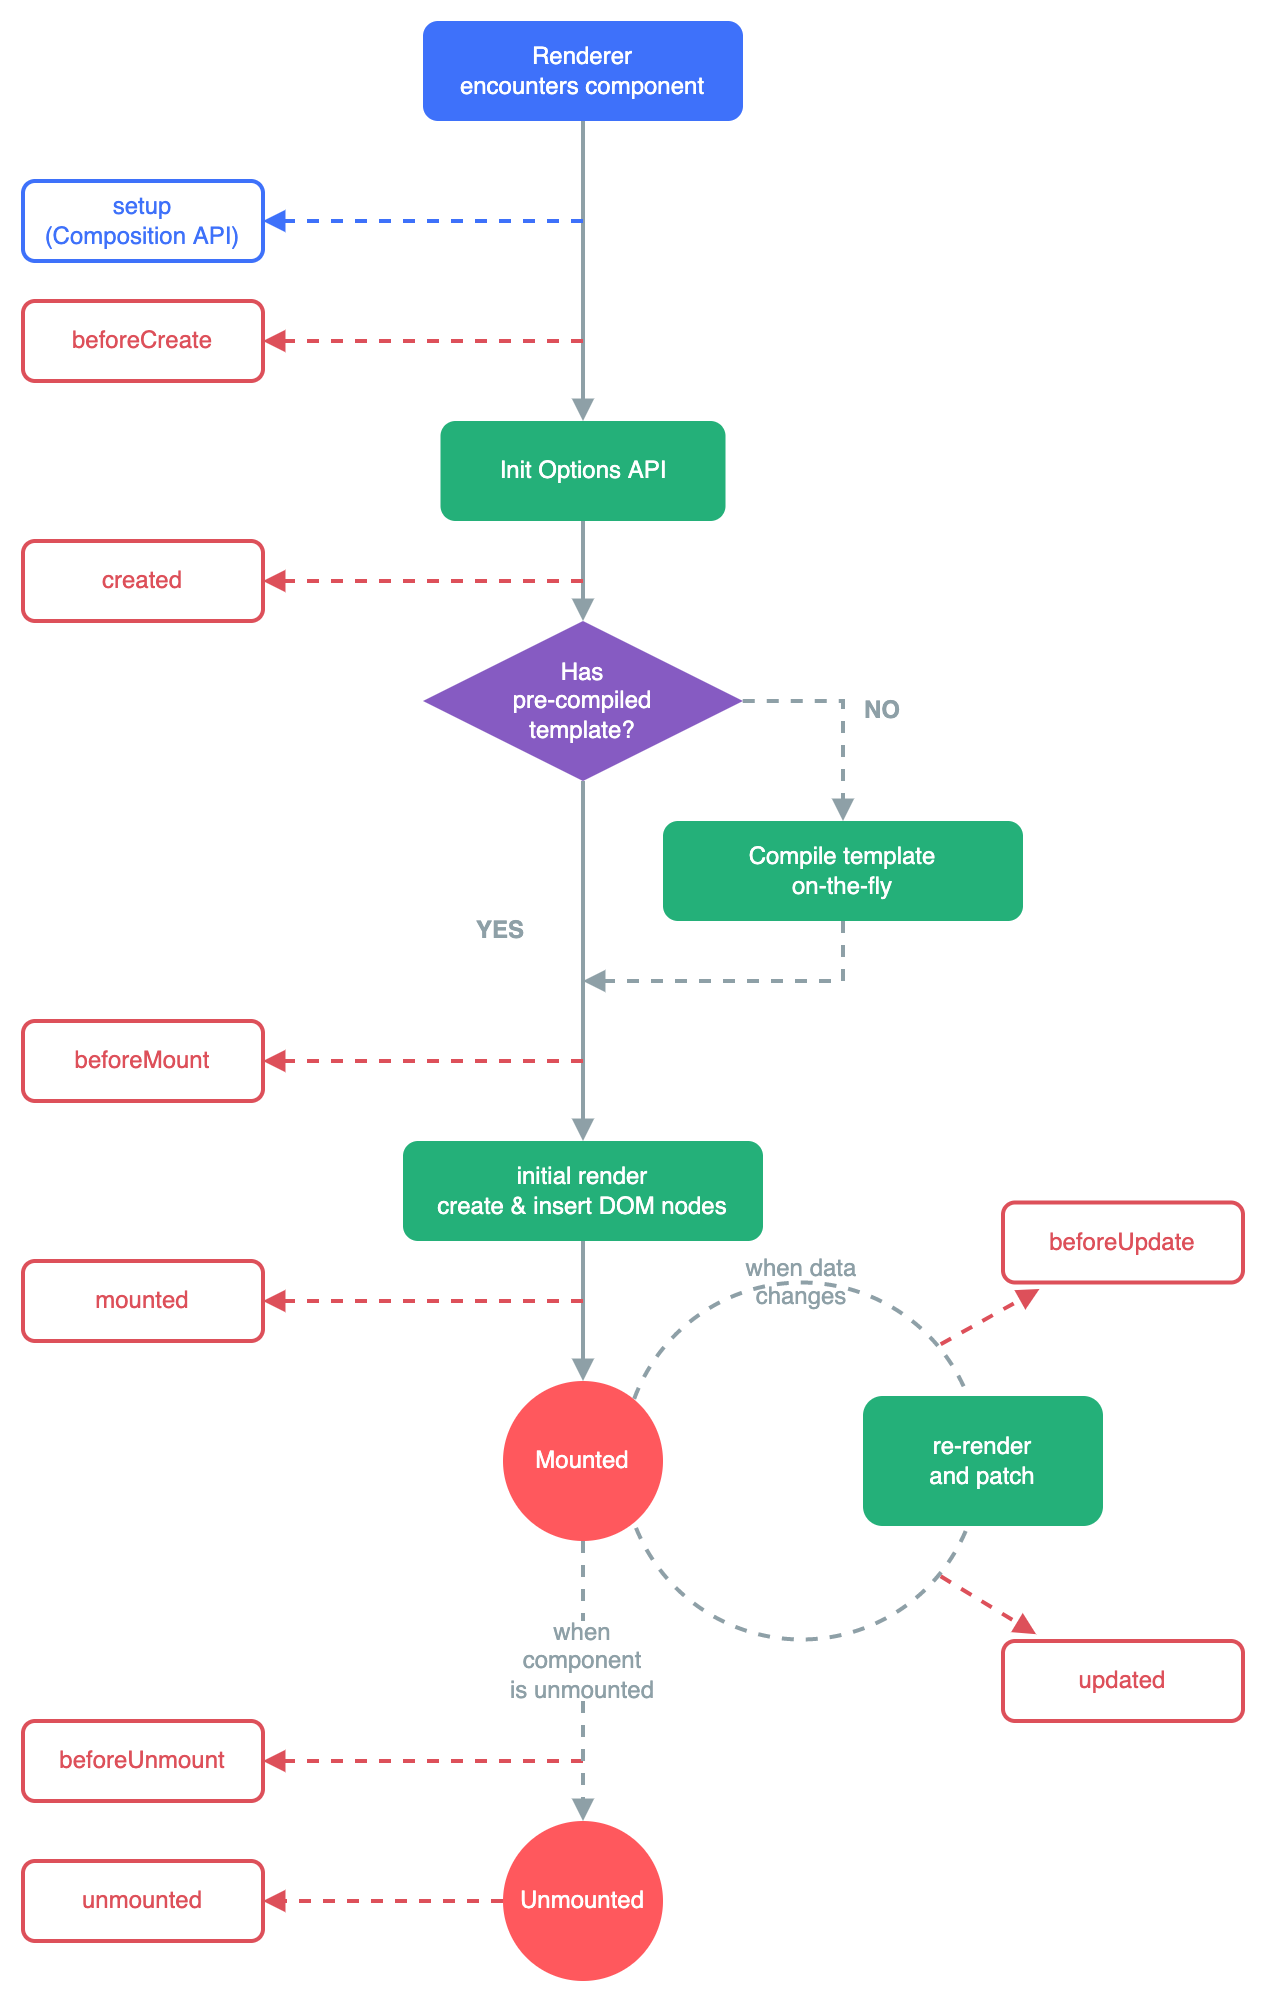

# 监听器(Watchers)
数据的监听：在数据发生变化时，执行相应的操作

* 事件监听只能监听事件：内部自动的事件，界面用户触发的事件，内部手动触发(`$emit`)的事件
* 计算属性的`setter`可以用来监听数据，但不适合执行一些有“副作用”的操作，例如更改DOM、根据异步结果更改其它响应性数据
* Vue提供了`watch`选项来监听响应性数据

```html
<p>
  Ask a yes/no question:
  <input v-model="question" />
</p>
<p>{{ answer }}</p>
```
<div class="warn">如何在question变化时，异步地更新answer的值？</div>

```js
export default {
  data() {
    return {
      question: '',
      answer: 'Questions usually contain a question mark. ;-)'
    }
  },
  watch: {
    // 只要 question 变化, 该回调函数就会执行
    question(newQuestion, oldQuestion) {
      if (newQuestion.indexOf('?') > -1) {
        this.getAnswer()
      }
    }
  },
  methods: {
    async getAnswer() {
      this.answer = 'Thinking...'
      try {
        const res = await fetch('https://yesno.wtf/api')
        this.answer = (await res.json()).answer
      } catch (error) {
        this.answer = 'Error! Could not reach the API. ' + error
      }
    }
  }
}
```

可以监测一个用“路径”指定的变量
```js
export default {
  watch: {
    // 注意：只能是简单的路径，不支持表达式
    'some.nested.key'(newValue) {
      // ...
    }
  }
}
```

watch默认下是浅层次监听，要实现深层次监听，需加上`deep: true` （但是开销可能会很大）
```js
export default {
  watch: {
    someObject: {
      handler(newValue, oldValue) {
        // 注意: 如果是深层的变化，这里`newValue` 与 `oldValue` 相等
      },
      deep: true
    }
  }
}
```

Eager Watchers: 监听器只在被监听数据变化时才会触发，若想要在初始值上也执行，需加上`immediate: true`
```js
export default {
  // ...
  watch: {
    question: {
      handler(newQuestion) {
        // this will be run immediately on component creation.
      },
      // force eager callback execution
      immediate: true
    }
  }
  // ...
}
```

Callback Flush Timing：响应性数据变化时会同时触发组件的更新和监听器
默认情况下，监听器执行回调函数会在组件更新之前
* 在监听器回调函数中访问的DOM是更新前的
* 若想访问更新后的DOM, 使用`flush: 'post'`
```js
export default {
  // ...
  watch: {
    key: {
      handler() {},
      flush: 'post'
    }
  }
}
```
* Callback是回调函数的意思


也可以通过实例方法来创建监听器，这样的好处：
- 条件性地创建
- 可以提前取消
```js
export default {
  created() {
    this.$watch('question', (newQuestion) => {
      // ...
    })
  }
}
```
监听器会在组件卸载（unmount)时自动取消，若想提前取消，需使用`$watch`方法的返回值（返回值是一个函数）

```js
const unwatch = this.$watch('foo', callback)

// ...when the watcher is no longer needed:
unwatch()
```

# Template Refs
Vue的声明式渲染模型将几乎所有的DOM操作抽象地隐藏起来，这样可以免去直接操作DOM的麻烦。

但有时也需要直接操作DOM, 可以在模板上使用`ref`这个特殊属性(attribute)来得到一个DOM元素或子组件实例的引用
- 该引用可以通过`this.$refs`来访问
- DOM元素(或组件实例）加载完成后该引用才有效

```js
<script>
export default {
  mounted() {
    this.$refs.input.focus()
  }
}
</script>
```
```html
<input ref="input">
```

用在`v-for`上时，得到的引用是一个数组（数组元素是DOM元素）
```html
<script>
export default {
  data() {
    return {
      list: [
        /* ... */
      ]
    }
  },
  mounted() {
    console.log(this.$refs.items)
  }
}
</script>

<template>
  <ul>
    <li v-for="item in list" ref="items">
      {{ item }}
    </li>
  </ul>
</template>
```

## 绑定到函数
`ref`不仅可以绑定到一个字符串上，还可以绑定到一个函数（或方法）上，该函数的参数是DOM元素的引用
- 元素卸载时，参数为null

```html
<input :ref="(el) => { /* 将 el 赋值给一个 property 或 ref */ }">
```

## 用于组件上
上面的例子都是用于原生的DOM元素，Ref也可以用于自定义组件（模板）上


```html
<script>
import Child from './Child.vue'

export default {
  components: {
    Child
  },
  mounted() {
    // this.$refs.child will hold an instance of <Child />
  }
}
</script>

<template>
  <Child ref="child" />
</template>
```

得到的引用是该组件实例的引用，等价于它的`this`

这也就意味着，父组件实例对子组件实例有完全的访问（父组件中使用`this.$refs.child`获得子组件的`this`)

这样会产生“紧耦合”，在真正需要的情况下才使用。正常情况下使用标准的pros和emit来进行父组件与子组件的交互。

可以使用`expose`选项来限制访问

```js
export default {
  expose: ['publicData', 'publicMethod'],
  data() {
    return {
      publicData: 'foo',
      privateData: 'bar'
    }
  },
  methods: {
    publicMethod() {
      /* ... */
    },
    privateMethod() {
      /* ... */
    }
  }
}
```
以上例子中，父组件实例通过子组件实例的引用，只能访问expose限制的属性

# 组件基础
使用组件可以将整个UI分隔成独立和可复用的部件，将整个应用组织成一棵组件相互内联的树

这与html元素的内联类似, Vue的组件与Web component很像，两者的对比参考官方文档：[中文](https://v3.cn.vuejs.org/guide/web-components.html#%E5%AF%B9%E6%AF%94-web-components-%E4%B8%8E-vue-%E7%BB%84%E4%BB%B6) &nbsp;[英文](https://vuejs.org/guide/extras/web-components.html) 

组件(component)：组件本质上是一个JS对象(Object)，具有一些特殊的属性（称作选项），作为组件实例的模板（类比C++中的类）。
组件实例(component instance): 组件实例本质上也是一个JS对象（Object)，起到模板引擎的作用，作为组件的实例对象（类比C++中类的对象）。

实例化(instanation)：每个组件都可以实例化任意多次
- 根组件实例：本质上与子组件实例相同，只是做为app实例渲染的起点，通过app的挂载来实例化
- 子组件实例：写在父组件的模板中，随着父组件的实例化而实例化

模板引擎：组件实例起到模板引擎的作用，这是Vue的最核心的功能：即从数据到视图的映射 UI=VM(State)
- UI是指html元素，VM是指组件实例，State是指VM的响应式状态
- 这里的映射是指响应式双向绑定，基于组件实例的模板（一般定义在组件`template`选项中，不同实例共享相同的模板）来实现

渲染机制：
- Vue将组件模板编译成渲染函数(render function), 这一步可以提前由构建过程执行，也可以实时编译。渲染函数的返回值是虚拟DOM。
- 在组件挂载(mount)时Vue会调用该函数生成虚拟DOM, 然后基于虚拟DOM生成实际的DOM。在此过程中，Vue会记录并监听所有的响应式依赖。
- 当响应式依赖变化时发生改变时, Vue会使用渲染函数生成新的虚拟DOM, 然后遍历新的虚拟DOM树，与旧的虚拟DOM树比较，更新实际DOM树。

渲染机制具体细节参考文档：[中文](https://v3.cn.vuejs.org/guide/optimizations.html) &nbsp; [英文](https://vuejs.org/guide/extras/rendering-mechanism.html)

注：Vue提供相应的API, 可以不使用template，直接使用render functions, 使用方式参考文档：[中文](https://v3.cn.vuejs.org/guide/render-function.html) &nbsp; [英文](https://vuejs.org/guide/extras/render-function.html)

组件的使用有三个步骤：
1. 定义组件: 各个选项，尤其是template选项(根组件可以不定义template选项，使用app的挂载目标元素内部内容作为模板）
2. 注册组件: 通过app全局注册，或者通过父组件注册（根组件需要传递给createApp函数，可以把这个看作注册）
3. 使用组件(实例化): 根组件的实例化是在app的挂载过程中执行的，子组件的实例化是跟随父组件的实例化执行的（事先写在父组件的模板中）

## 定义组件
```js
export default {
  data() {
    return {
      count: 0
    }
  },
  template: `
    <button @click="count++">
      You clicked me {{ count }} times.
    </button>`
}
```
- 组件的本质是一个有特殊属性（选项）的JS对象
- `template`是一个JS字符串，作为组件实例的模板。若该字符串以`#`开头，则会解析成css id选择器，使用对应的html元素作为模板。
- 若存在`render`选项，`template`选项会被忽略
- 若根组件没有`template` 和 `render` 选项，Vue会使用加载元素的`innerHTML`作为模板

## 注册子组件
局部注册(local registration): 通过父组件的components选项注册
```html
<script>
import ButtonCounter from './ButtonCounter.vue'

export default {
  components: {
    ButtonCounter  // 这是 ButtonCounter: ButtonCounter 的简写
  }
}
</script>
```
- 组件注册时，除了组件对象（ButtonCounter)外，还需要提供一个组件名称('ButtonCounter')，一般采用PascalCase命名法：每个单词首字母大写
- 局部注册的组件只能在父组件的顶层使用，不能在父组件的后代组件中使用中（这里“使用”是指实例化）

全局注册(global registration): 通过app的`component`方法
```js
import MyComponent from './App.vue'
app.component('MyComponent', MyComponent)
```
全局注册的组件可以在整个app中使用：包括子组件、孙组件

局部注册与全局注册对比，参考文档：[英文](https://vuejs.org/guide/components/registration.html)

## 组件实例化
In-DOM写法
```html
<div id="app">
    <my-component></my-component>
</div>
```
内联JS字符串写法
```js
{
    template: `<MyComponent />`
}
```
- 根组件是在app加载过程中实例化的
- 子组件是跟随父组件的实例化而实例化：写在父组件的模板中

模板的In-DOM写法指的是直接写在DOM中，先经过浏览器解析，再交给Vue编译。以下不属于In-DOM写法：
* Single-File Components (SFC): 将一个组件写在单独的一个文件中，需要构建(后台编译）
* Inlined template strings: 写成JS字符串 `template: '...'`
* `<script type="text/x-template">`

以下是传统写法，写成JS代码（以下是单独的js文件，也可以写在html的`<script>`中）
```js
export default {
  data() {
    return {
      count: 0
    }
  },
  template: `
    <button @click="count++">
      You clicked me {{ count }} times.
    </button>`
}
```

以下是SFC写法，将一个组件写在单独的`.vue`文件(格式类似html)中, 最主要有三个标签：`<script>, <template>, <style>`
```html
<script>
export default {
  data() {
    return {
      count: 0
    }
  }
}
</script>

<template>
  <button @click="count++">You clicked me {{ count }} times.</button>
</template>
```
SFC语法参考文档：[中文](https://v3.cn.vuejs.org/api/sfc-spec.html) &nbsp; [英文](https://vuejs.org/api/sfc-spec.html)

若是In-DOM写法，子组件的模板有以下问题：
1. DOM对字母大小写不区分，需将原有的PascalCase, camelCase（除第一个单词外的单词首字母大写）名称转换成连字符写法（单词全部小写，之间加一个连字符）；组件参数命名一般使用camelCase(驼峰法）命名
2. 需使用开标签和闭标签，不能使用自关闭标签
3. 位置限制，有些标签对里面的标签类型有限制，例如`<table>, <ul>, <ol>`

其它写法中的模板没有这些问题
1. 区分大小写
2. 可以（建议）使用自关闭标签
3. 位置无限制

## 参数传递
同一个组件可能有许多个实例，每个实例一般只是大致的结构、功能相同，但具体的数据不同。要生成不同的实例，可以使用prop属性来从父组件实例传递数据到子组件实例（类比函数调用）

- prop属性在父组件模板中作为自定义html属性(attribute), 父组件实例通过该自定义的attribute来提供数据（作为实参）

```html
<div id="app">
    <blog-post title="post1"></blog-post>
    <blog-post title="post2"></blog-post>
    <blog-post title="post3"></blog-post>
</div>
```
注意：这里`title`是静态的html属性，当然也可以用`v-bind`绑定到动态的表达式上

- 子组件中使用props来注册prop属性（类比函数的形参表）
- prop属性可以在子组件中的模板中访问，也可以在子组件中通过`this`访问（与组件的数据属性相同，类比函数的代码块内访问形参）

```html
<!-- BlogPost.vue -->
<script>
export default {
  props: ['title'] // props选项是一个字符串数组
}
</script>

<template>
  <h4>{{ title }}</h4>
</template>
```

课后作业：使用子组件(BlogPost)的方式写一张博客主页  
大致要求（具体见学习通作业说明）：
1. 采用`v-for`来遍历posts数组
2. 每篇博文都对应于一个BlogPost组件的实例

```js
data(){
    return {
        posts: [
            { id: 1, title: 'title1', content: 'content1'},
            { id: 2, title: 'title2', content: 'content2' },
            { id: 3, title: 'title3', content: 'content3' }
          ]
    }
}
```   

## 事件监听
prop属性的作用是将数据从父组件传递到子组件，若想反过来传递呢：Vue的组件实例提供了一个自定义事件，父组件可以监听子组件的事件

以下为父组件（实际上是一个根组件）实例，其在第一个子组件(blog-post)实例上监听一个名称为“enlarge-text"的自定义事件
```html
<div id="app">
    <blog-post title="post1" @enlarge-text="postFontSize += 0.1"></blog-post>
    <blog-post title="post2"></blog-post>
    <blog-post title="post3"></blog-post>
</div>
```
其中postFontSize是根组件的一个数据属性，用来控制字体大小

以下为子组件模板，如何实现”单击button时触发enlarge-text事件"这一功能？
```html
<template>
  <div class="blog-post">
    <h4>{{ title }}</h4>
    <button>Enlarge text</button>
  </div>
</template>
```


使用内置的`$emit`方法，这是一个组件实例方法

```html
<template>
  <div class="blog-post">
    <h4>{{ title }}</h4>
    <button @click="$emit('enlarge-text')">Enlarge text</button>
  </div>
</template>
```
`$emit`方法也可以带参数

```html
 <button @click="$emit('enlarge-text', 0.2)">Enlarge text</button>
```

可以（不必要）在子组件的emits选项中列出（声明）所有的自定义事件：有一些好处
```js
{
  props: ['title'],
  emits: ['enlarge-text']
}
```
自定义事件参考文档：[中文](https://v3.cn.vuejs.org/guide/component-custom-events.html) &nbsp; [英文](https://vuejs.org/guide/components/events.html)

## 使用slot
prop属性可以将父组件的数据传给子组件，但是传递的是html元素属性的值。要想将html元素的内部内容（innerHTML)传递给子组件，可以使用slot（插槽）
例如：在父组件中，想将子组件`AlertBox`的内容传递给该子组件
```html
<AlertBox>
  Something bad happened.
</AlertBox>
```
在子组件模板中，通过`<slot />`来接收
```
<template>
  <div class="alert-box">
    <strong>This is an Error for Demo Purposes</strong>
    <slot />
  </div>
</template>
```

<div class="warn">思考：这里的传递的内部内容(innerHTML)只能是文本？可不可以是任意的html元素？甚至是Vue的组件？</div>

slot参考文档：[中文](https://v3.cn.vuejs.org/guide/component-slots.html) &nbsp; [英文](https://vuejs.org/guide/components/slots.html)

## 动态组件
Vue的`<component>`元素可以用来实现不同组件的动态切换, 典型的例子是标签的切换

```html
<component :is="currentTab"></component>
```
其中`currentTab`可以是：
- 子组件的名称
- 子组件对象本身

切换过程中，旧的组件会卸载掉，若想只是让其处于“不活动”状态而不卸载，可以使用`<KeepAlive`组件

`<KeepAlive>`组件参考文档：[英文](https://vuejs.org/guide/built-ins/keep-alive.html)